# Regression Diagnostics

In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using ols, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold (at least approximately).

One solution to the problem of uncertainty about the correct specification is to use robust methods, for example robust regression or robust covariance (sandwich) estimators. The second approach is to test whether our sample is consistent with these assumptions.



## Estimate a regression model

In [6]:
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressaors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())
%matplotlib inline

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 08 May 2017   Prob (F-statistic):           1.90e-08
Time:                        20:24:12   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

## Normality of the residuals

In [2]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 3.3936080248431706),
 ('Chi^2 two-tail prob.', 0.18326831231663335),
 ('Skew', -0.486580343112234),
 ('Kurtosis', 3.0034177578816332)]

In [3]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.713437811597184), ('Two-tail probability', 0.15618424580304799)]

# Influences Tests
Once created, an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation. For example, we can compute and extract the first few rows of DFbetas by:

In [4]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[-0.00301154,  0.00290872,  0.00118179],
       [-0.06425662,  0.04043093,  0.06281609],
       [ 0.01554894, -0.03556038, -0.00905336],
       [ 0.17899858,  0.04098207, -0.18062352],
       [ 0.29679073,  0.21249207, -0.3213655 ]])

Useful information on leverage can also be plotted:

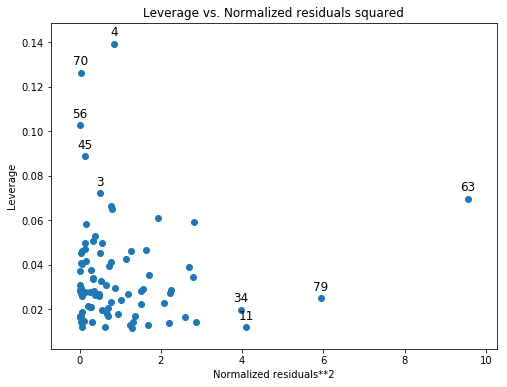

In [7]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

# Multiconllinearity

In [8]:
# condition number 
np.linalg.cond(results.model.exog)

702.17921454900625

# Heteroskedasity Tests

In [9]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)


[('Lagrange multiplier statistic', 4.8932133740939667),
 ('p-value', 0.086586905023521704),
 ('f-value', 2.5037159462564396),
 ('f p-value', 0.087940287826729857)]

# Linearity

In [10]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -1.0796490077827041), ('p value', 0.28346392475394466)]